In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [206]:
df = pd.read_csv('question_dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
df.corr().unstack().sort_values().drop_duplicates()

previous        pdays            -0.587514
                nr.employed      -0.501333
euribor3m       previous         -0.454494
previous        emp.var.rate     -0.420489
                cons.price.idx   -0.203130
pdays           cons.conf.idx    -0.091342
previous        campaign         -0.079141
duration        campaign         -0.071699
cons.conf.idx   previous         -0.050936
pdays           duration         -0.047577
duration        nr.employed      -0.044703
pdays           age              -0.034369
euribor3m       duration         -0.032897
duration        emp.var.rate     -0.027968
nr.employed     age              -0.017725
campaign        cons.conf.idx    -0.013733
duration        cons.conf.idx    -0.008173
age             duration         -0.000866
emp.var.rate    age              -0.000371
age             cons.price.idx    0.000857
                campaign          0.004594
cons.price.idx  duration          0.005312
age             euribor3m         0.010767
duration   

In [8]:
df.info()
#No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185AC6C6080>,
      dtype=object)

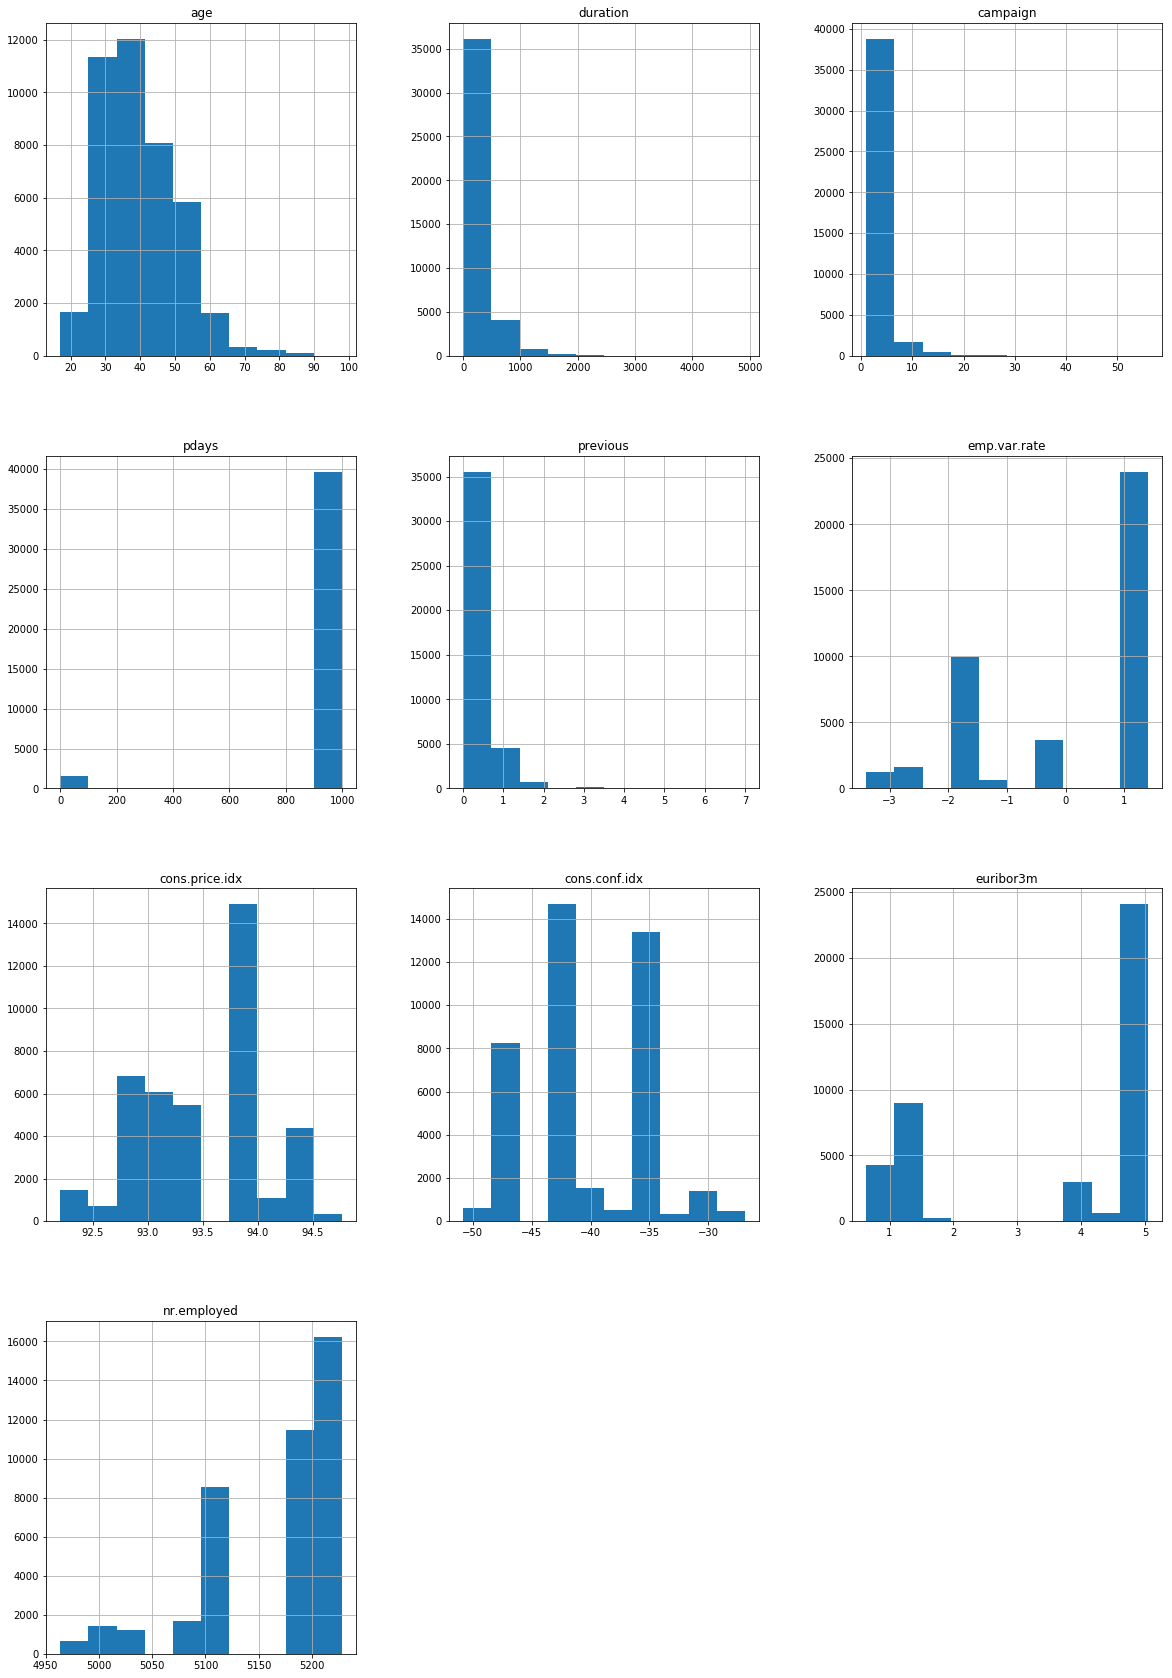

In [9]:
df.hist(figsize=(20,30))

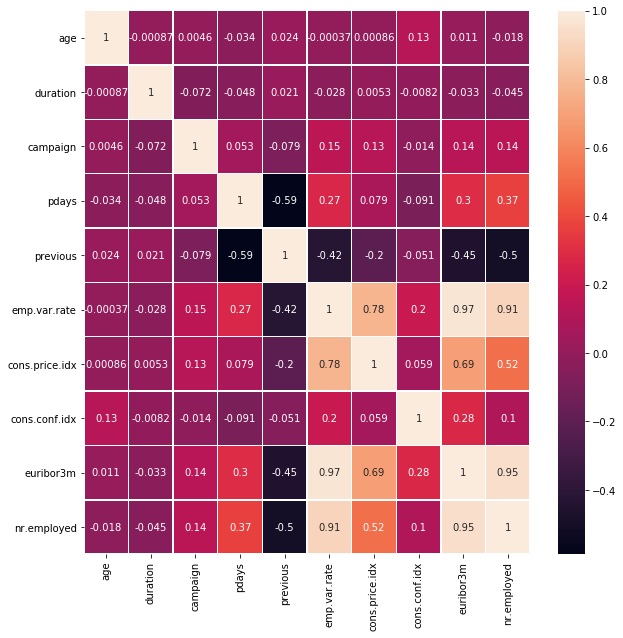

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# Which age group mostly accept offer ?

In [234]:
df['older_contact_bin'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80,90])

In [248]:
new_bin_age_graph = pd.crosstab(df['older_contact_bin'],df['y']).apply(lambda x: (x/x.sum())*100, axis=1)
new_bin_age = new_bin_age_graph.drop(columns="no")
new_bin_age = new_bin_age.sort_values(by=['yes'],ascending=False)
new_bin_age

y,yes
older_contact_bin,
"(80, 90]",49.541284
"(70, 80]",47.194719
"(60, 70]",43.442623
"(20, 30]",14.731465
"(50, 60]",10.653907
"(30, 40]",9.746720
"(40, 50]",8.173828


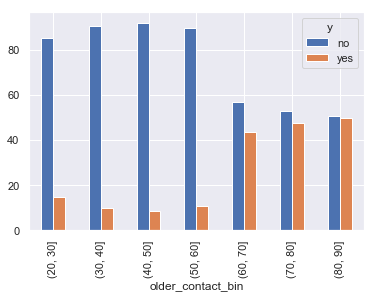

In [249]:
new_bin_age_graph.plot.bar(stacked=False)
plt.legend(title='y')
plt.show()

In [242]:
#People with age more than 60 have around 40-50% chances to accept the offer.

# What is the marital status of people who says yes or no?

In [214]:
percent_age = pd.crosstab(df['marital'],df['y']).apply(lambda x: (x/x.sum())*100, axis=1)
percent_age_graph = percent_age.sort_values(by=['yes'],ascending=False)
percent_age = percent_age_graph.drop(columns="no")
percent_age

y,yes
marital,
unknown,15.000000
single,14.004149
divorced,10.320902
married,10.157253


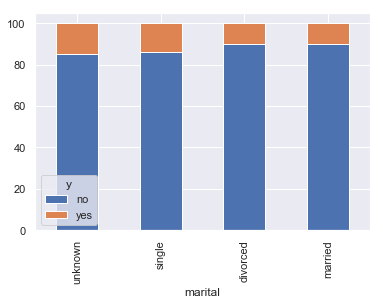

In [217]:
percent_age_graph.plot.bar(stacked=True)
plt.legend(title='y')
plt.show()

In [110]:
#People with unknown category and single are more likely to say yes. 

# What is the type of job of people who says yes ?

In [221]:
cross_job = pd.crosstab(df['job'],df['y']).apply(lambda x: (x/x.sum())*100, axis=1)
job_yes = cross_job.sort_values(by=['yes'],ascending=False, inplace=False)
job_yes = job_yes.drop(columns="no")
job_yes
#Student,retired and unemployed more likely to accept the bank term deposit offer. 

y,yes
job,
student,31.428571
retired,25.232558
unemployed,14.201183
admin.,12.972558
management,11.217510
unknown,11.212121
technician,10.826042
self-employed,10.485574
housemaid,10.000000


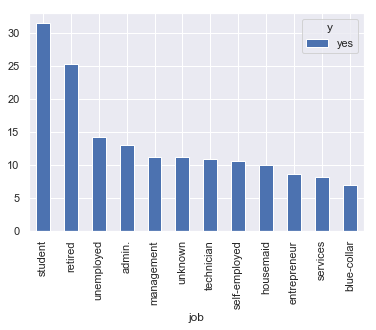

In [224]:
job_yes.plot.bar(stacked=True)
plt.legend(title='y')
plt.show()

# Is call duration impact the sell ?

C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


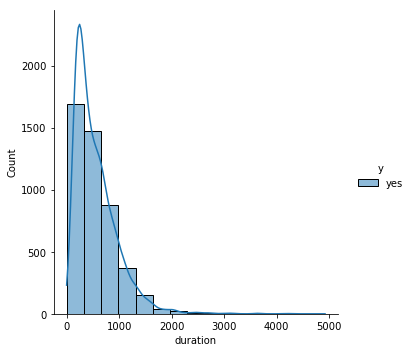

In [16]:
sns.displot(df, x="duration", hue="y",bins=15, hue_order=['yes'],kde=True)
# Call with less than 1000 seconds leads to more sale of the bank offer. 

# Which months are best for selling the product?

In [17]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [227]:
cross_month = pd.crosstab(df['month'],df['y']).apply(lambda x: (x/x.sum())*100, axis=1)
cross_month = cross_month.sort_values(by=['yes'],ascending=False, inplace=False)
cross_month = cross_month.drop(columns="no")
cross_month
# People prefer to take offer in months of march, december, september. 

y,yes
month,
mar,50.549451
dec,48.901099
sep,44.912281
oct,43.871866
apr,20.478723
aug,10.602137
jun,10.511470
nov,10.143867
jul,9.046557


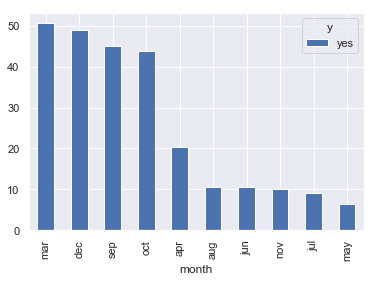

In [223]:
cross_month.plot.bar(stacked=True)
plt.legend(title='y')
plt.show()

# Which days in week are best for selling the product?

In [134]:
cross_day_of_week = pd.crosstab(df['day_of_week'],df['y']).apply(lambda x: (x/x.sum())*100, axis=1)
cross_day_of_week = cross_day_of_week.sort_values(by=['yes'],ascending=False, inplace=False)
cross_day_of_week = cross_day_of_week.drop(columns="no")
cross_day_of_week
#Thurday is best day for marketing and monday has least chance. 

y,yes
day_of_week,
thu,12.118752
tue,11.779975
wed,11.667076
fri,10.808739
mon,9.948320


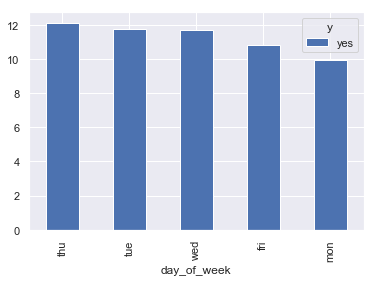

In [228]:
cross_day_of_week.plot.bar(stacked=True)
plt.legend(title='y')
plt.show()

In [20]:
new_pdays = df[df['pdays'] != 999]
final_pday = new_pdays[['pdays']]
df['final_pday'] = final_pday
df[['final_pday']].describe()
#To remove value=999 as per given detail of data.
#pdays: number of days that passed by after the client was last contacted from a previous campaign
#Average days are 6 since client was contacted

,final_pday
count,1515.000000
mean,6.014521
std,3.824906
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,27.000000


In [230]:
cross_job = pd.crosstab(df.pdays, df.y,margins=True)
pday_yes = cross_job.sort_values(by=['yes'],ascending=False, inplace=False)
pday_yes = pday_yes.drop(columns="no")
pday_yes = pday_yes.drop(columns="All")
pday_yes = pday_yes.drop(999)
pday_yes = pday_yes.drop('All')
pday_yes.head()
#People prefer to say yes when they were conatcted in last 3 or 6 days. 

y,yes
pdays,
3,298
6,289
4,63
7,40
2,37


# Is Consumer Confidence Index impact much for selling the product ?

C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


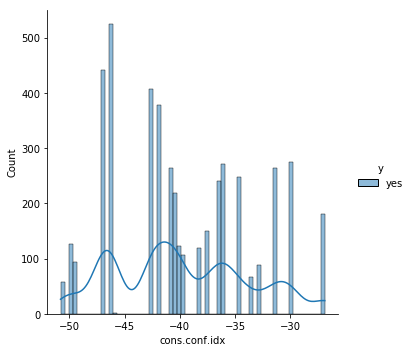

In [22]:
sns.displot(df, x="cons.conf.idx", hue="y",hue_order=['yes'],kde=True)
#Consumer Confidence Index doesnot impact much for selling the product. 

# Is Consumer Price Index impact much for selling the product ?

C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\PRATIK KATHESIA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


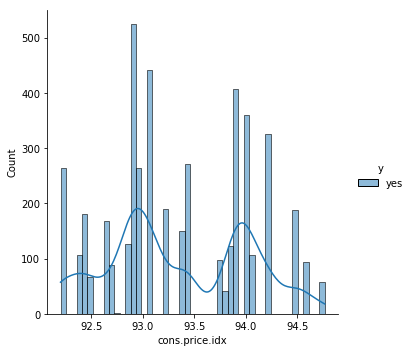

In [23]:
sns.displot(df, x="cons.price.idx", hue="y",hue_order=['yes'],kde=True)
#Also, Consumer Price Index doesnot impact much for selling the prodcut but index between 93 and 94 leads to more selling.

# Is older people more likely to say yes on telephone over cellular phone 

In [136]:
df['older_contact_bin'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80,90])

In [250]:
orange_1 = sns.light_palette("orange", as_cmap=True)
older_contact_result = pd.crosstab(index=df['older_contact_bin'], columns=[df['contact'],df['y']]).apply(lambda x: (x/x.sum())*100, axis=1)
older_contact_result

contact             cellular             telephone          
y                         no        yes         no       yes
older_contact_bin                                           
(20, 30]           54.604446  12.757145  30.664089  1.974320
(30, 40]           55.160208   7.903570  35.093073  1.843149
(40, 50]           53.193359   6.328125  38.632812  1.845703
(50, 60]           53.572568   8.899522  35.773525  1.754386
(60, 70]           47.540984  39.139344   9.016393  4.303279
(70, 80]           45.214521  43.234323   7.590759  3.960396
(80, 90]           48.623853  44.954128   1.834862  4.587156

In [26]:
# There is no relation between contact type and age.

# More previous contact means more likely to say yes?
## (previous: number of contacts performed before this campaign and for this client (numeric))

In [256]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [276]:
df['previous_no_contact'] = np.where(df['previous']== 0, 0, 1)
previous_contact_yes = pd.crosstab(index=df['older_contact_bin'], columns=[df['previous_no_contact'],df['y']])
previous_contact_yes = previous_contact_yes.iloc[:,[1,3]].apply(lambda x: (x/x.sum())*100, axis=1)
previous_contact_yes
#Here, 0 means no conatact and 1 means one or more than 1 time conatacted.

previous_no_contact,0,1
y,yes,yes
older_contact_bin,,
"(20, 30]",67.572634,32.427366
"(30, 40]",71.571697,28.428303
"(40, 50]",71.565114,28.434886
"(50, 60]",66.916168,33.083832
"(60, 70]",46.698113,53.301887
"(70, 80]",51.048951,48.951049
"(80, 90]",55.555556,44.444444


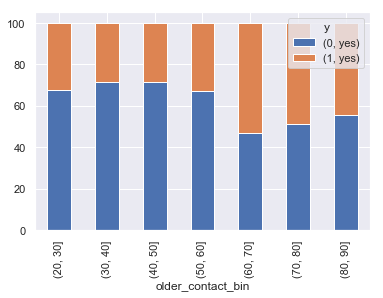

In [277]:
previous_contact_yes.plot.bar(stacked=True)
plt.legend(title='y')
plt.show()

In [272]:
#When people have more than 60, they accept offer when they are contacted one or more than one.

# Is previous failure means again failure? poutcome




 



In [291]:
poutcome_prevoius = pd.crosstab(index=df['older_contact_bin'], columns=[df['poutcome'],df['y']])
poutcome_prevoius = poutcome_prevoius.drop(columns="nonexistent")
poutcome_prevoius = poutcome_prevoius.apply(lambda x: (x/x.sum())*100, axis=1)
poutcome_prevoius

poutcome             failure               success           
y                         no        yes         no        yes
older_contact_bin                                            
(20, 30]           58.566434  11.713287  11.188811  18.531469
(30, 40]           72.027650   8.847926   7.050691  12.073733
(40, 50]           71.568627   9.536542   7.219251  11.675579
(50, 60]           61.776581  11.036339   8.479139  18.707941
(60, 70]           34.433962  20.283019  12.264151  33.018868
(70, 80]           37.404580  22.900763   9.160305  30.534351
(80, 90]           26.829268  12.195122  14.634146  46.341463

<Figure size 720x576 with 0 Axes>

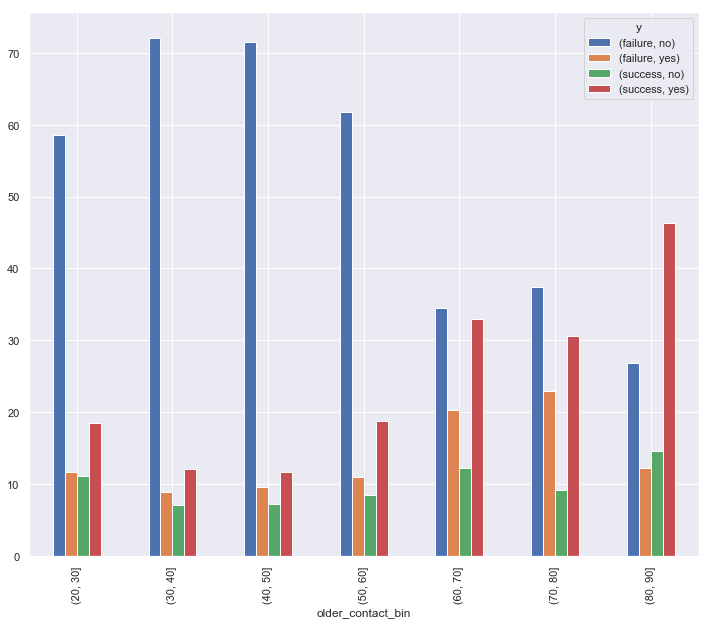

In [301]:
from matplotlib.pyplot import figure
fig= plt.figure(figsize=(10,8))

poutcome_prevoius.plot.bar(stacked=False,figsize=(12,10))
plt.legend(title='y')
plt.show()

In [30]:
#There are different scenario for each case. 
#People having age less than 50 reject offer if they rejected offer previously.
#People having age 60 ore more accept offer if they accepted offer previously.

# People with credit default likely to say yes?

In [167]:
cross_job_1 = pd.crosstab(df.default, df.y,margins=True) 
credit_default = cross_job_1.sort_values(by=['yes'],ascending=False, inplace=False)
credit_default = credit_default.drop(columns="All")
credit_default = credit_default.drop('All')
credit_default.apply(lambda x: (x/x.sum())*100, axis=1)

y,no,yes
default,,
no,87.121026,12.878974
unknown,94.847040,5.152960
yes,100.000000,0.000000


In [33]:
#People with credit default will never accept the bank offer.

# People with housing loan likely to say yes?

In [196]:
cross_job_3 = pd.crosstab(df.housing, df.y,margins=True)
loan_yes = cross_job_3.sort_values(by=['yes'],ascending=False, inplace=False)
loan_yes = loan_yes.drop(columns="All")
loan_yes = loan_yes.drop('All')
loan_yes.apply(lambda x: (x/x.sum())*100, axis=1)

y,no,yes
housing,,
yes,88.380608,11.619392
no,89.120395,10.879605
unknown,89.191919,10.808081


In [172]:
#There is no impact of housing loan on bank offer.

# In which job category people belong to who have housing loan and said yes to the offer?

In [252]:
cross_job_4 = pd.crosstab(index=[df['job']], columns=[df['housing'],df['y']])
cross_job_4 = cross_job_4.drop("no",axis=1)
cross_job_4 = cross_job_4.drop("unknown",axis=1)
cross_job_4 = cross_job_4.apply(lambda x: (x/x.sum())*100, axis=1)
cross_job_4

housing              yes           
y                     no        yes
job                                
admin.         86.688253  13.311747
blue-collar    93.333333   6.666667
entrepreneur   90.757381   9.242619
housemaid      90.555556   9.444444
management     88.590604  11.409396
retired        73.654709  26.345291
self-employed  89.729730  10.270270
services       91.414634   8.585366
student        67.091295  32.908705
technician     88.578540  11.421460
unemployed     84.919210  15.080790
unknown        87.790698  12.209302

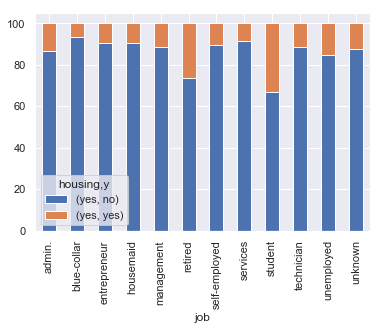

In [254]:
cross_job_4.plot.bar(stacked=True)
plt.show()

In [194]:
#Student,retired and unemployed more likely to accept the bank term deposit offer when they have housing loan.

# People with personal loan likely to say yes?

In [195]:
personal_loan_yes = pd.crosstab(df.loan, df.y,margins=True) 
personal_loan_yes.sort_values(by=['yes'],ascending=False, inplace=False)
personal_loan_yes = personal_loan_yes.drop("All",axis=1)
personal_loan_yes = personal_loan_yes.drop("All",axis=0)
personal_loan_yes.apply(lambda x: (x/x.sum())*100, axis=1)

y,no,yes
loan,,
no,88.659794,11.340206
unknown,89.191919,10.808081
yes,89.068502,10.931498


In [197]:
#There is no impact of personal loan on bank offer.